TODO:
- брать максимально в котором не уверен
- анализ дубликатов по максимальным косинусам

In [1]:
%env CUDA_VISIBLE_DEVICES=2,3

env: CUDA_VISIBLE_DEVICES=2,3


In [225]:
cat_indexes['Наука']

[0,
 2,
 4,
 17,
 22,
 23,
 25,
 26,
 29,
 32,
 33,
 36,
 37,
 40,
 42,
 44,
 49,
 50,
 53,
 59,
 63,
 65,
 70,
 72,
 74,
 76,
 78,
 81,
 85,
 88,
 89,
 94,
 97,
 98,
 100,
 107,
 113,
 115,
 116,
 117,
 119,
 128,
 130,
 131,
 138,
 139,
 141,
 142,
 147,
 148,
 154,
 155,
 158,
 160,
 162,
 165,
 171,
 172,
 177,
 180,
 181,
 189,
 190,
 194,
 195,
 197,
 199,
 210,
 212,
 223,
 227,
 228,
 231,
 232,
 234,
 240,
 242,
 245,
 252,
 255,
 259,
 260,
 261,
 262,
 269,
 275,
 278,
 282,
 283,
 288,
 292,
 294,
 297,
 299,
 303,
 307,
 309,
 310,
 314,
 317,
 318,
 321,
 325,
 327,
 328,
 330,
 332,
 333,
 336,
 338,
 343,
 349,
 350,
 351,
 353,
 357,
 364,
 365,
 375,
 378,
 381,
 382,
 386,
 389,
 392,
 393,
 396,
 400,
 407,
 409,
 417,
 419,
 425,
 433,
 435,
 441,
 442,
 444,
 445,
 451,
 452,
 463,
 464,
 468,
 471,
 472,
 473,
 477,
 479,
 486,
 488,
 493,
 496,
 500,
 501,
 505,
 508,
 510,
 511,
 513,
 519,
 522,
 525,
 532,
 533,
 534,
 535,
 536,
 543,
 545,
 546,
 551,
 552,

In [223]:
cat_cosine['Наука']

array([[0.        , 0.5057014 , 0.54351556, ..., 0.6073546 , 0.5141828 ,
        0.4409703 ],
       [0.        , 0.        , 0.45361722, ..., 0.5581305 , 0.51054776,
        0.4785182 ],
       [0.        , 0.        , 0.        , ..., 0.5721685 , 0.61522615,
        0.5172246 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.649635  ,
        0.57409024],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.60490334],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [8]:
from config import cfg

cfg.text_encoder_model = 'cointegrated/rubert-tiny2'
cfg.text_tokenizer = 'cointegrated/rubert-tiny2'
cfg.batch_size = 128

In [230]:
next(iter(train_loader))

{'text1': {'input_ids': tensor([[    2,  4470,   320,  ...,     0,     0,     0],
          [    2, 71799, 25188,  ...,     0,     0,     0],
          [    2,  4470, 31945,  ...,     0,     0,     0],
          ...,
          [    2, 34945, 83373,  ...,  8278,   619,     3],
          [    2, 39835,  3995,  ...,     0,     0,     0],
          [    2, 76630, 32580,  ...,     0,     0,     0]]),
  'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]),
  'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0]])},
 'text2': {'input_ids': tensor([[    2,  1499, 13483,  ..., 40009,   733,     3],
          [    2

In [369]:
import os
import random
import numpy as np
import torch
from torch.utils.data import IterableDataset, DataLoader
import torch

# from config import logger
from config import cfg


class Dataset(IterableDataset):
    def __init__(self, titles, contents, categories, tokenizer, mode=None):
        self.titles = titles
        self.contents = contents
        self.categories = categories
        self.tokenizer = tokenizer
        
        self.batch_size = 128

        self.titles_enc = tokenizer(
            list(self.titles),
            padding=True,
            truncation=True,
            max_length=200,
            # pad_to_multiple_of=200,
            return_tensors="pt"
        )
        
        self.contents_enc = tokenizer(
            list(self.contents),
            padding=True,
            truncation=True,
            max_length=200,
            # pad_to_multiple_of=200,
            return_tensors="pt"
        )
    def iter_batch(self):
        while True:
            perm_idx = np.random.permutation(len(self.titles))
            # while True:
    #             cat = random.choice(list(cat_indexes.keys())) # TODO
    #             indexes = cat_indexes[cat]
    #             cosines = cat_cosine[cat]

    #             pick = random.randint(0, len(indexes)-1)
    #             max_indexes = cosines[pick].argsort()[-self.batch_size:]
    #             real_indexes = [indexes[i] for i in max_indexes]
            for i in range(0, len(self.titles), self.batch_size):
                real_indexes = perm_idx[i:i+self.batch_size]
                titles_batch = {
                    k: v[real_indexes] for k, v in self.titles_enc.items()
                }
                contents_batch = {
                    k: v[real_indexes] for k, v in self.contents_enc.items()
                }

                # for i in range(len(real_indexes)):
                #     rand = random.random()
                #     for k in self.titles_enc.keys():
                #         if k == 'Софт':
                #             continue
                    #     if rand > 0.75:
                    #         titles_batch[k][i], contents_batch[k][i] = contents_batch[k][i], titles_batch[k][i]
    #                     if rand > 0.8:
    #                         titles_batch[k][i] = contents_batch[k][i]
    #                     elif rand > 0.6:
    #                         contents_batch[k][i] = titles_batch[k][i]


                yield dict(text1=titles_batch, text2=contents_batch)

    def __iter__(self):
        for item in self.iter_batch():
            yield item

In [10]:
ds = iter(Dataset(titles, contents, tags, tokenizer))

In [9]:
tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny2', cache_dir='rubert')

In [7]:
ds = Dataset(titles, contents, tokenizer)

In [8]:
item = next(iter(ds))

In [3]:
!pip install omegaconf

Looking in indexes: https://pypi.yandex-team.ru/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141231 sha256=02108ec9629a163712a1c20e26a1647cc48e397f956964fe8c719068baa8075a
  Stored in directory: /home/gorodion/.cache/pip/wheels/28/c3/f4/c3162a876604b2fdca3464abe01eea20a57aca8244ecf1709f
Successfully built antlr4-python3-runtime


In [33]:
encoder = TextEncoder()

NameError: name 'TextEncoder' is not defined

In [145]:
df = pd.read_csv('lenta_tech.csv')

In [158]:
titles = df.title.values
contents = df.text.values
tags = df.tags.values

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
titles, titles_val, contents, contents_val, tags, tags_val = train_test_split(titles, contents, tags, stratify=tags, test_size=0.2)


In [161]:
from collections import defaultdict

In [185]:
len(contents)

15065

In [184]:
len(titles)

15065

In [183]:
len(tags)

15065

In [192]:
max(cat_indexes['Техника'])

15064

In [189]:
cat_indexes.keys()

dict_keys(['Интернет', 'Наука', 'Космос', 'Техника', 'Гаджеты', 'Софт'])

In [162]:
cat_indexes = defaultdict(list)
for i, tag in enumerate(tags):
    cat_indexes[tag].append(i)

In [163]:
cat_indexes_val = defaultdict(list)
for i, tag in enumerate(tags_val):
    cat_indexes_val[tag].append(i)

In [219]:
random.choice(list(cat.keys()))

'Наука'

In [229]:
len(cat_indexes['Наука'])

5785

In [164]:
def get_embedding(text, model, tokenizer, device=cfg.device):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        inputs = {k: v.to(device) for k, v in t.items()}
        model_output = model(inputs)
    embeddings = torch.nn.functional.normalize(model_output)
    return embeddings[0].cpu().numpy()

In [165]:
def get_embeddings(texts, model, tokenizer):
    return np.array([get_embedding(text, model, tokenizer) for text in tqdm(texts)])

In [240]:
df.iloc[real_indexes]

,url,title,text,topic,tags,date
17087,https://lenta.ru/news/2019/06/28/signal/,Раскрыта загадка «инопланетных» сигналов из ко...,Международная группа ученых впервые выявила ис...,NaN,Космос,2019-06-28
17860,https://lenta.ru/news/2019/09/11/mmbh/,Найдены следы загадочного объекта в Млечном Пути,Международная группа астрономов обнаружила убе...,NaN,Космос,2019-09-11
18422,https://lenta.ru/news/2019/11/11/universe/,Раскрыта главная тайна Вселенной,Американские астрономы получили новое значение...,NaN,Космос,2019-11-11
10791,https://lenta.ru/news/2017/08/09/big_bang/,Обнаружены самые быстрые воронки во Вселенной,"Физики, работающие в Брукхейвенской национальн...",Наука и техника,Космос,2017-08-09
14379,https://lenta.ru/news/2018/08/10/galaxy/,Объяснено появление загадочного объекта рядом ...,Международная группа астрономов из США и Испан...,Наука и техника,Космос,2018-08-10
...,...,...,...,...,...,...
18823,https://lenta.ru/news/2019/12/13/blackhole/,Раскрыта правда о невозможной черной дыре,"Независимые группы ученых выяснили, что обнару...",NaN,Космос,2019-12-13
18180,https://lenta.ru/news/2019/10/15/hole/,Названа неожиданная угроза от черных дыр,Астрофизик Джереми Шнитман (Jeremy Schnittman)...,NaN,Космос,2019-10-15
18352,https://lenta.ru/news/2019/11/01/blackhole/,Открыта загадочная разновидность черных дыр,Ученые Университета штата Огайо в США обнаружи...,NaN,Космос,2019-11-01
17111,https://lenta.ru/news/2019/07/01/hole/,Раскрыта тайна появления необъяснимых черных дыр,Астрономы Западного университета в Онтарио (Ка...,NaN,Космос,2019-07-01


In [166]:
calc_acc()

  0%|          | 0/3767 [00:00<?, ?it/s]

  0%|          | 0/3767 [00:00<?, ?it/s]

{'Интернет_acc': 0.5987482614742698,
 'Наука_acc': 0.43042350907519444,
 'Гаджеты_acc': 0.6244897959183674,
 'Космос_acc': 0.428169014084507,
 'Техника_acc': 0.7258064516129032,
 'Софт_acc': 0.8387096774193549,
 'accuracy': 0.4908415184496947}

In [211]:
for i,j in zip(*np.where(spam > 0.95)):
    print(titles[cat['Космос']][i])
    print(titles[cat['Космос']][j])
    print();print()

SpaceX представила анимацию полета тяжелой ракеты Falcon Heavy
SpaceX показала готовую к пуску сверхтяжелую ракету Falcon Heavy


Частный космический корабль Dragon отстыковался от МКС
Космический грузовик Dragon отстыковался от МКС


НАСА показало видео вращающихся Плутона и Харона
НАСА показало видео вращения Плутона и Харона


Планетологи объяснили темный цвет Меркурия
Планетологи объяснили аномально темный цвет Меркурия


Первая ступень Falcon 9 опрокинулась при посадке на морскую платформу
Первая ступень Falcon 9 успешно приземлилась на плавучую платформу


Первая ступень Falcon 9 опрокинулась при посадке на морскую платформу
Первая ступень Falcon 9 жестко приземлилась на плавучую платформу


SpaceX показала видео взрыва первой ступени Falcon 9
Компания SpaceX показала полную запись взрыва первой ступени Falcon 9


SpaceX показала видео взрыва первой ступени Falcon 9
SpaceX показала видео приземления ступени Falcon 9


Спутник на солнечных парусах сделал первые фотографии
Спутник 

In [ ]:
def on_new_epoch():
    

In [46]:
contents_enc['input_ids'].shape

torch.Size([18832, 200])

In [138]:
cfg.text_encoder_model

'cointegrated/rubert-tiny2'

In [288]:
class TextEncoder(nn.Module):
    def __init__(self, model_name=cfg.text_encoder_model, trainable=cfg.trainable, cache_dir=cfg.cache_dir, text_embedding=cfg.text_embedding):
        super().__init__()
        self.model = AutoModel.from_pretrained(model_name, cache_dir=cache_dir)
        self.layer_norm = nn.LayerNorm(text_embedding)
        for p in self.model.parameters():
            p.requires_grad = trainable

        self.target_token_idx = 0

    def forward(self, inputs: dict):
        output = self.model(**inputs)
        last_hidden_state = output.last_hidden_state[:, self.target_token_idx, :]
        return self.layer_norm(last_hidden_state)


In [140]:
model = AutoModel.from_pretrained('cointegrated/rubert-tiny2', cache_dir='rubert')

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [142]:
tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny2', cache_dir='rubert')

In [148]:
model = TextEncoder('cointegrated/rubert-tiny2', cache_dir='rubert')

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [171]:
get_embeddings(titles[:5], model, tokenizer).shape

(5, 312)

In [12]:
titles_enc_batch = {
    k: v[indexes] for k, v in titles_enc.items()
}

titles_pred = model(titles_enc_batch)

In [14]:
contents_enc_batch = {
        k: v[indexes] for k, v in contents_enc.items()
    }

contents_pred = model(contents_enc_batch)

In [274]:
def cross_entropy(preds, targets, reduction='none'):
    log_softmax = nn.LogSoftmax(dim=-1)
    loss = (-targets * log_softmax(preds)).sum(1)
    if reduction == "none":
        return loss
    elif reduction == "mean":
        return loss.mean()

def CosLoss(model, batch, temperature=cfg.temperature):
    titles_pred = model(batch['text1'])
    contents_pred = model(batch['text2'])
    
    logits = (titles_pred @ contents_pred.T) / temperature
    targets = torch.eye(len(titles_pred)).cuda()
    # titles_similarity = titles_pred @ titles_pred.T
    # contents_similarity = contents_pred @ contents_pred.T
    # targets = F.softmax(
    #     (titles_similarity + contents_similarity) / 2 * temperature, dim=-1
    # )
    texts_loss1 = cross_entropy(logits, targets, reduction='none')
    texts_loss2 = cross_entropy(logits.T, targets.T, reduction='none')
    # texts_loss2 = cross_entropy(logits.T, targets.T, reduction='none')
    loss = (texts_loss1 + texts_loss2) / 2.0  # shape: (batch_size)
    return loss.mean()

In [20]:
model = Model()

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
model(titles_enc_batch, contents_enc_batch)

tensor(2.7003, grad_fn=<MeanBackward0>)

In [27]:
title_embeds = np.load('title_embeds.npy')
embeds = np.load('embeds.npy')

In [30]:
np.mean().argmax(1) == np.arange(len(title_embeds)))

0.266089634664401

In [268]:
from sklearn.metrics.pairwise import cosine_similarity


def calc_cosine_metrix():
    global cat_cosine
    cat_cosine = {
        cat: cosine_similarity(
            get_embeddings(
                titles[indexes], 
                model, 
                tokenizer
            ),
            get_embeddings(
                contents[indexes],
                model,
                tokenizer
            )
        )
            for cat, indexes in cat_indexes.items()
    }

In [ ]:
cosine = cosine_similarity(title_embeds, embeds)

In [33]:
for k, v in cat_indexes.items():
    print(k)
    cosine = cosine_similarity(title_embeds[v], embeds[v])
    print((cosine.argmax(1) == np.arange(len(cosine))).mean())
    print()

Наука
0.22523768366464997

Софт
0.6282051282051282

Интернет
0.3740086266870739

Гаджеты
0.35918367346938773

Космос
0.213641488162345

Техника
0.4597207303974221



In [ ]:
cfg.num_steps = 10000

In [356]:
from tqdm.notebook import tqdm
import torch
import logging
import sys
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
    
# TODO accuracy -> metric
class Trainer:
    def __init__(self, model, loss_fn, opt, scheduler=None, device='cuda', metric_callback=lambda x,y:np.nan, plot_callback=None, ckpt=None, log_file=sys.stdout):
        self.model = model.to(device)
        self.loss_fn = loss_fn
        self.opt = opt
        self.scheduler = scheduler
        self.device = device
        self.plot_callback = plot_callback
        self.metric_callback = metric_callback # TODO as class with accumulating
        self.ckpt = ckpt
        self.log_file = open(log_file, 'w') if type(log_file)==str else log_file
        
        self.metrics = ['loss', 'accuracy'] + ['Наука_acc', 'Софт_acc', 'Интернет_acc', 'Гаджеты_acc', 'Космос_acc', 'Техника_acc']
        self.history = None



    def train(self, train_dl, num_epoch=1, train_steps=None, val_steps=None, plot_interval=None, save_path=None, resume=False):
        if not resume or self.history is None:
            self.history = {stat: {'train': [], 'val': []} for stat in self.metrics}

        # if train_steps is not None:
        #     logging.info(f'The number of iterations to go through the entire dataset : {len(train_dl) // train_steps}')
        # if val_steps is not None:
        #     logging.info(f'The number of iterations to go through the entire dataset : {len(val_dl) // val_steps}')

        try:
            for epoch in trange(num_epoch):
                print(f'EPOCH {epoch}/{num_epoch}', file=self.log_file, flush=True)
                epoch_loss = 0.
                for step, batch in zip(trange(train_steps),train_dl):
                    for key in ['text1', 'text2']:
                        batch[key] = {k: v.to(self.device) for k, v in batch[key].items() if k not in ('caption',)}
                    loss = self.loss_fn(model, batch)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    epoch_loss += loss.item()
                    print(f'{step}/{train_steps} steps. Loss: {loss.item():.3f}', end='\r', file=self.log_file, flush=True)
                print(' '*50, end='\r', file=self.log_file, flush=True)
                self.history['loss']['train'].append(epoch_loss / train_steps)
                metrics = self.metric_callback()
                for metric, val in metrics.items():
                    self.history[metric]['val'].append(val)
                
                # logging
                clear_output()
                self.print_stats()

                # visualizations
                if self.plot_callback is not None and epoch != 1:
                    self.plot_callback(self.history)

                # scheduler
                if self.scheduler is not None:
                    self.scheduler.step(self.history['loss']['val'][-1])

                # checkpoint
                if self.ckpt is not None:
                    if self.ckpt(self.history['accuracy']['val'][-1]):
                        print(f'Metric improved: {self.ckpt.best:.2%}. Model saved', file=self.log_file, flush=True)
                
                # calc_cosine_metrix()
                print(file=self.log_file, flush=True)
                # additional functions
                # func(self, val_dl)
        except KeyboardInterrupt:
            # TODO align history
            print('Keyboard interrupt')

    @torch.no_grad()
    def evaluate(self, loader, steps=None):
        y_pred_all = None
        y_all = None
        total_steps = len(loader) if steps is None else steps
        
        for step, (X, y) in enumerate(loader, 1):
            y_pred = self.model(X.to(self.device)).cpu()
            
            y_pred_all = torch.cat([y_pred_all, y_pred]) if y_pred_all is not None else y_pred
                
            y_all = torch.cat([y_all, y]) if y_all is not None else y
            
            print(f'{step}/{total_steps} valid steps', end='\r', file=self.log_file, flush=True)
            if step == total_steps: break
        print(' '*50, end='\r', file=self.log_file, flush=True)
        
        return self.loss_fn(y_pred_all, y_all), \
                self.metric_callback(y_pred_all, y_all)
            
    def print_stats(self):
        history = self.history
        for phase in ('train', 'val'):
            print(f'---{phase.upper()}---', file=self.log_file, flush=True)
            for metric in self.metrics:
                stat = history[metric][phase]
                if stat:
                    print(f'{metric}: {stat[-1]:.2f}', file=self.log_file, flush=True)

In [357]:
def plot_lc(history): # TODO with/without metric and train/val mode
    fig, axes = plt.subplots(ncols=len(history), figsize=(8*len(history), 6))
    for ax, (name, vals) in zip(axes, history.items()):
        ax.plot(vals['train'], label=f'Train {name}')
        ax.plot(vals['val'], label=f'Val {name}')
        ax.set_xlabel('Num epoch')
        ax.set_ylabel(name)
        ax.set_title(name + ' graph')
        plt.axis('on')
        ax.legend()
    plt.show()
    fig.savefig('learning_curves.png')
    plt.close()

In [358]:
class CheckPointer:
    def __init__(self, model, mode='max', save_path='model.pth', best=None):
        self.model = model
        self.save_path = save_path
        
        if mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf if best is None else best
        elif mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf if best is None else best
        else:
            raise ValueError(f'Invalid `mode` "{mode}"')
            
    def __call__(self, curr):
        if self.monitor_op(curr, self.best):
            self.best = curr
            torch.save(self.model.state_dict(), self.save_path)
            return True
        return False

In [360]:
def calc_acc():
    text_embeddings1 = get_embeddings(titles_val, model, tokenizer)
    text_embeddings2 = get_embeddings(contents_val, model, tokenizer)
    
    metrics = {
        cat + '_acc': ((text_embeddings1[index] @ text_embeddings2[index].T).argmax(1) == np.arange(len(text_embeddings1[index]))).mean()
        for cat, index in cat_indexes_val.items()
    }
    metrics['accuracy'] = ((text_embeddings1 @ text_embeddings2.T).argmax(1) == np.arange(len(text_embeddings1))).mean()
    # metrics['accuracy'] = np.mean(list(metrics.values()))
    return metrics

In [377]:
tokenizer = AutoTokenizer.from_pretrained(cfg.text_tokenizer, cache_dir=cfg.cache_dir)
model = TextEncoder().to(cfg.device)

train_loader = Dataset(titles, contents, tags, tokenizer)

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [362]:
calc_acc()

  0%|          | 0/3767 [00:00<?, ?it/s]

  0%|          | 0/3767 [00:00<?, ?it/s]

{'Интернет_acc': 0.5709318497913769,
 'Наука_acc': 0.35695764909248057,
 'Гаджеты_acc': 0.6040816326530613,
 'Космос_acc': 0.3873239436619718,
 'Техника_acc': 0.6881720430107527,
 'Софт_acc': 0.8387096774193549,
 'accuracy': 0.4345633129811521}

In [378]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="max", patience=cfg.patience, factor=cfg.factor
)
ckpt = CheckPointer(model, save_path='best_e-5.pt', best=0.22)

In [311]:
model0 = TextEncoder()
model0.load_state_dict(torch.load('best75.pt'))

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [312]:
torch.save(model0.model.state_dict(), 'best75_enc.pt')

In [314]:
model.load_state_dict(torch.load('best75_enc.pt'))

<All keys matched successfully>

In [334]:
from scipy.spatial.distance import cosine

class SemanticModel:
    def __init__(self, model_path, model_name=cfg.text_encoder_model, device=cfg.device):
        self.model = AutoModel.from_pretrained(model_path, config=AutoConfig.from_pretrained(model_name))
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        self.model.to(device)
        self.model.eval()
        self.device = device
        
    def __call__(self, text1: str, text2: str):
        emb1 = self.get_embedding(text1)
        emb2 = self.get_embedding(text2)
        
        sim = 1 - cosine(emb1, emb2)
        return sim
    
    def get_embedding(self, text):
        t = self.tokenizer(text, padding=True, truncation=True, return_tensors='pt')
        with torch.no_grad():
            inputs = {k: v.to(self.device) for k, v in t.items()}
            model_output = self.model(**inputs)
        embeddings = model_output.last_hidden_state[:, 0, :]
        embeddings = torch.nn.functional.normalize(embeddings)
        return embeddings[0].cpu().numpy()

In [350]:
model = SemanticModel('best75_enc.pt')

In [345]:
model.model = AutoModel.from_pretrained(cfg.text_encoder_model, cache_dir=cfg.cache_dir)

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [336]:
model.get_embedding('Владимир путин заценил')

array([-1.25678763e-01, -2.54373848e-02,  8.35844222e-03, -1.16889648e-01,
       -5.92478514e-02, -1.70727782e-02, -4.93552499e-02, -4.95266952e-02,
       -5.69983125e-02, -5.51043078e-03,  4.01953310e-02,  5.52434996e-02,
        3.21429633e-02,  7.93742463e-02,  3.42684574e-02, -1.71202663e-02,
        2.12214030e-02, -3.23861055e-02, -1.53070083e-02,  5.30452169e-02,
       -3.58004197e-02,  2.87305359e-02,  2.99022477e-02,  1.55278752e-02,
        1.17172144e-01,  2.99404152e-02, -5.80185559e-03,  4.89398539e-02,
       -9.79513396e-03, -5.11294231e-02,  7.56416842e-03,  3.63361165e-02,
        2.84112021e-02, -9.67139751e-03, -1.18235350e-01,  2.79204883e-02,
        5.93362795e-03,  1.27586909e-02, -3.18049304e-02,  2.45072367e-03,
        1.78631544e-02,  1.18686430e-01,  1.32853150e-01, -7.58410338e-03,
       -3.24528292e-02, -1.51510816e-02,  5.10478625e-03,  6.36045961e-03,
       -2.30923817e-02, -2.98824199e-02, -2.03945469e-02,  3.43805775e-02,
        2.92570293e-02, -

In [351]:
model('Москва стала первой в Европе среди городов с инновациями по борьбе с COVID-19', 
      '''
     
Ежегодно в мае-июне Проектный офис Факультета экономических и социальных наук завершает работу над бизнес-проектами и представляет результаты заказчикам – российским и международным компаниям.
Среди компаний-заказчиков были крупные российские компании и организации: Сбер, РЖД, ВЭБ, Минстрой РФ, Ростуризм, Правительство Москвы, киностудия им. Горького, холдинг САВООВ ФУДС, Альфа-Банк, ВТБ, Дом РФ, Очаково, Сегежа-Групп а также представительства зарубежных компаний: BMW, DeLonghi, L’Oreal, Pfizer, Ritter Sport, Xiaomi, Avon, Schneider Group и др.
Проектный офис ФЭСН является крупнейшим университетским проектным центром не только по количеству и сложности проектов, и не только по количеству студентов-участников. Он уже создал и создает новые масштабные форматы проектной работы. Так, еще пять лет назад ФЭСН вовлек в проектную деятельность университеты пяти стран Европы и стал разрабатывать с ними полугодичные проекты для международных компаний на английском языке. Некоторые сложные проекты делались усилиями проектных групп нескольких стран; например, в проекте от генерального директора BMW Russia по «Разработке маркетинговой стратегии перехода компании BMW с бензиновых двигателей на электрические в России» бакалавры ФЭСН работали вместе с магистрами из Германии и Бельгии. А в одном из проектов участвовали команды из Германии, Бельгии, Италии, 4 проектные группы из Франции и 5 из Бразилии.''')

0.9052563309669495

In [379]:
trainer = Trainer(
    model=model,
    loss_fn=CosLoss,
    opt=optimizer,
    # scheduler=lr_scheduler,
    metric_callback=calc_acc,
    plot_callback=plot_lc,
    ckpt=ckpt
)

---TRAIN---
loss: 0.06
---VAL---
accuracy: 0.65
Наука_acc: 0.59
Софт_acc: 0.84
Интернет_acc: 0.73
Гаджеты_acc: 0.76
Космос_acc: 0.61
Техника_acc: 0.82


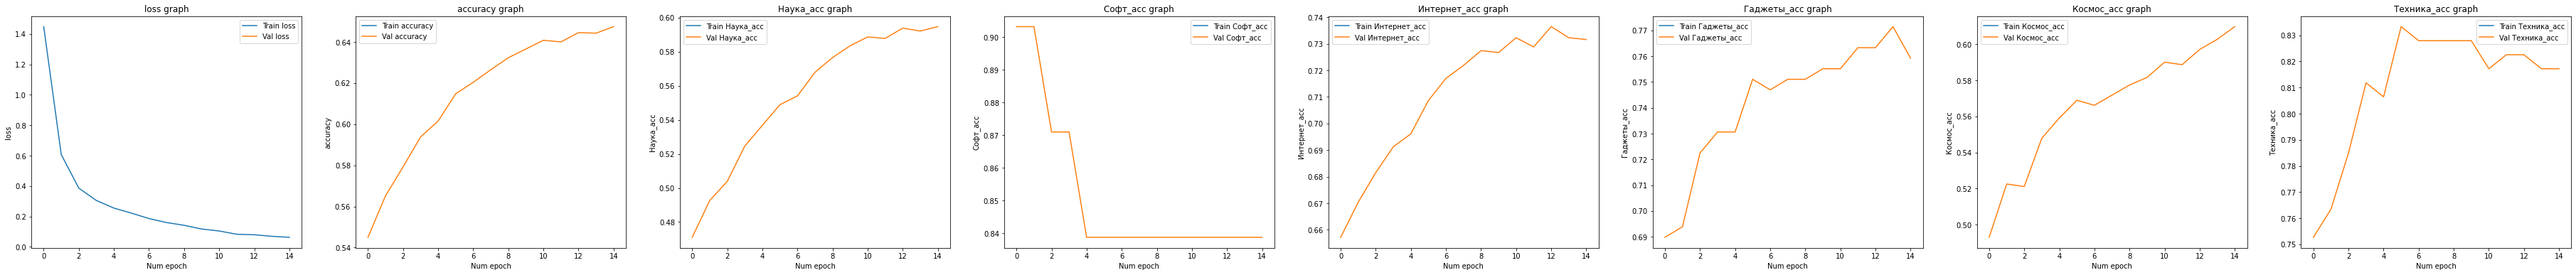

Metric improved: 64.75%. Model saved



In [380]:
trainer.train(
    train_loader,
    num_epoch=15,
    train_steps=150,
)

In [54]:
embeds0 = get_embeddings(
            titles[cat_indexes['Наука']],
            model, 
            tokenizer
        )

  0%|          | 0/5785 [00:00<?, ?it/s]

In [55]:
embeds = get_embeddings(
            contents[cat_indexes['Наука']],
            model, 
            tokenizer
        )

  0%|          | 0/5785 [00:00<?, ?it/s]

In [56]:
np.mean(cosine_similarity(embeds0, embeds).argmax(1) == np.arange(len(embeds0)))

0.22523768366464997

In [49]:
np.mean(cosine_similarity(embeds0, embeds).argmax(1) == np.arange(len(embeds0)))

0.5178910976663785

In [50]:
model = TextEncoder()

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
cosine_similarity(embeds[:32])

array([[1.        , 0.733655  , 0.7304486 , ..., 0.7213632 , 0.70672715,
        0.7665206 ],
       [0.733655  , 0.99999994, 0.66138726, ..., 0.74151874, 0.71158385,
        0.8116312 ],
       [0.7304486 , 0.66138726, 1.0000001 , ..., 0.6855321 , 0.6953336 ,
        0.7042901 ],
       ...,
       [0.7213632 , 0.74151874, 0.6855321 , ..., 0.99999994, 0.7572808 ,
        0.7208147 ],
       [0.70672715, 0.71158385, 0.6953336 , ..., 0.7572808 , 1.0000001 ,
        0.7142964 ],
       [0.7665206 , 0.8116312 , 0.7042901 , ..., 0.7208147 , 0.7142964 ,
        0.9999999 ]], dtype=float32)

In [ ]:
get_embeddings(titles[indexes])

In [27]:
cfg.text_encoder_model

'cointegrated/rubert-tiny2'

In [26]:
batch['text1']['input_ids'].shape

torch.Size([128, 200])

In [34]:
CosLoss(model, batch)

tensor(4.1032, device='cuda:0', grad_fn=<MeanBackward0>)

In [108]:
trainer.metrics

['loss',
 'accuracy',
 'Наука_acc',
 'Софт_acc',
 'Интернет_acc',
 'Гаджеты_acc',
 'Космос_acc',
 'Техника_acc']

In [95]:
trainer.history

{'loss': {'train': [4.181393146514893], 'val': []},
 'accuracy': {'train': [], 'val': [0.266089634664401]},
 'Наука_acc': {'train': [], 'val': [0.22523768366464997]},
 'Софт_acc': {'train': [], 'val': [0.6282051282051282]},
 'Интернет_acc': {'train': [], 'val': [0.3740086266870739]},
 'Гаджеты_acc': {'train': [], 'val': [0.35918367346938773]},
 'Космос_acc': {'train': [], 'val': [0.213641488162345]},
 'Техника_acc': {'train': [], 'val': [0.4597207303974221]}}

In [94]:
metrics

{'Наука_acc': 0.22523768366464997,
 'Софт_acc': 0.6282051282051282,
 'Интернет_acc': 0.3740086266870739,
 'Гаджеты_acc': 0.35918367346938773,
 'Космос_acc': 0.213641488162345,
 'Техника_acc': 0.4597207303974221,
 'accuracy': 0.266089634664401}

In [110]:
trainer.print_stats = Trainer(model,CosLoss,optimizer).print_stats

In [111]:
# for metric, val in metrics.items():
#     trainer.history[metric]['val'].append(val)

# logging
clear_output()
trainer.print_stats()

# visualizations
if trainer.plot_callback is not None and epoch != 1:
    trainer.plot_callback(self.history)

# scheduler
if trainer.scheduler is not None:
    trainer.scheduler.step(trainer.history['loss']['val'][-1])

# checkpoint
if trainer.ckpt is not None:
    if trainer.ckpt(trainer.history['accuracy']['val'][-1]):
        print(f'Metric improved: {trainer.ckpt.best:.2%}. Model saved', file=trainer.log_file, flush=True)

print(file=trainer.log_file, flush=True)

---TRAIN---
loss train


TypeError: 'NoneType' object is not subscriptable

In [115]:
trainer.history

{'loss': {'train': [4.181393146514893], 'val': []},
 'accuracy': {'train': [], 'val': [0.266089634664401, 0.266089634664401]},
 'Наука_acc': {'train': [], 'val': [0.22523768366464997, 0.22523768366464997]},
 'Софт_acc': {'train': [], 'val': [0.6282051282051282, 0.6282051282051282]},
 'Интернет_acc': {'train': [],
  'val': [0.3740086266870739, 0.3740086266870739]},
 'Гаджеты_acc': {'train': [],
  'val': [0.35918367346938773, 0.35918367346938773]},
 'Космос_acc': {'train': [], 'val': [0.213641488162345, 0.213641488162345]},
 'Техника_acc': {'train': [], 'val': [0.4597207303974221, 0.4597207303974221]}}

In [114]:
trainer.print_stats()

---TRAIN---
loss train


TypeError: 'NoneType' object is not subscriptable

In [113]:
trainer.history['loss']['train']

[4.181393146514893]

In [107]:
from pprint import pprint
pprint(trainer.history)

{'accuracy': {'train': [], 'val': [0.266089634664401, 0.266089634664401]},
 'loss': {'train': [4.181393146514893], 'val': []},
 'Гаджеты_acc': {'train': [],
                 'val': [0.35918367346938773, 0.35918367346938773]},
 'Интернет_acc': {'train': [], 'val': [0.3740086266870739, 0.3740086266870739]},
 'Космос_acc': {'train': [], 'val': [0.213641488162345, 0.213641488162345]},
 'Наука_acc': {'train': [], 'val': [0.22523768366464997, 0.22523768366464997]},
 'Софт_acc': {'train': [], 'val': [0.6282051282051282, 0.6282051282051282]},
 'Техника_acc': {'train': [], 'val': [0.4597207303974221, 0.4597207303974221]}}


In [19]:
CosLoss(model, batch)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper__index_select)

todo drop_last

In [35]:
def make_predictions(model, batch):
    text_embeddings1 = model.text_encoder(batch['text1'])
    text_embeddings2 = model.text_encoder(batch['text2'])

    text_embeddings1 = F.normalize(text_embeddings1, p=2, dim=-1)
    text_embeddings2 = F.normalize(text_embeddings2, p=2, dim=-1)
    predicts = (text_embeddings1 @ text_embeddings2.T).argmax(1).cpu().numpy()
    return predicts

In [ ]:
make_predictions(model, batch['text1'], )

In [ ]:
cat_indexes.keys()

dict_keys(['Наука', 'Софт', 'Интернет', 'Гаджеты', 'Космос', 'Техника'])

In [156]:
calc_acc()

  0%|          | 0/3767 [00:00<?, ?it/s]

  0%|          | 0/15065 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [75]:
best_acc

0.9952740016992353

In [72]:
cfg.save_path = 'best.pt'